# Hw1 Alejandro Moscoso and 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import csv
import ast
file_path =      r'D:\Ale\Documents\Technion\DataAnalisis\Homework\Hw1\airports.txt'
file_path_route =r'D:\Ale\Documents\Technion\DataAnalisis\Homework\Hw1\routes.txt'

# Basic Python 0
1. Draw N random iid samples from a 1D Gaussian distribution with mean = 0 sigma = 1(You can use numpy.random library).
2. Calculate the empirical mean of the random samples.
3. Plot the difference between the empirical mean and the true mean as a function of N.
4. On the same figure, add (you can use error bar function) the standard deviation of the empirical mean.





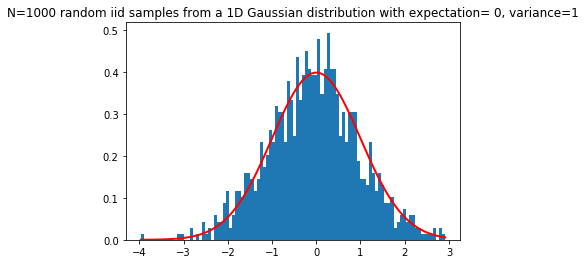

-0.0670014233263


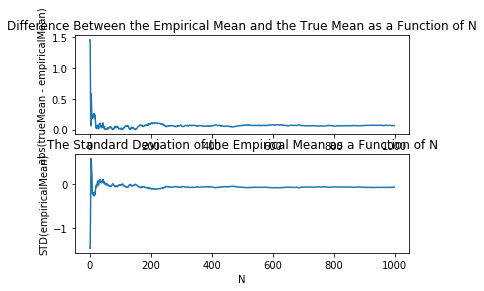

In [2]:
# 1: Draw N random iid samples
mu = 0
sigma = 1
N = 1000
samples = np.random.normal(mu, sigma, N)
count, bins, ignored = plt.hist(samples, 100, normed=True)
plt.figure(1)
plt.plot(bins, 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins - mu) ** 2 / (2 * sigma ** 2)), linewidth=2, color='r')
plt.title("N=1000 random iid samples from a 1D Gaussian distribution with expectation= 0, variance=1")
plt.show()
# 2: Calculate the empirical mean of the random samples
empirical_mean = np.mean(samples)
print(empirical_mean)
# 3: Plot the difference between the empirical mean and the true mean as a function of N
"""empirical mean as a function of the samples-"""
empiricalMean = [samples[0]]
for i in range(1, N):
    midSamples = samples[0:i]
    empiricalMean += [np.mean(midSamples)]
"""true mean array-"""
trueMean = mu * np.ones(N)
"""difference-"""
meanDiff = abs(trueMean - empiricalMean)
plt.figure(2)
plt.subplot(211)
plt.plot(meanDiff)
plt.xlabel('N')
plt.ylabel('abs(trueMean - empiricalMean)')
plt.title('Difference Between the Empirical Mean and the True Mean as a Function of N')
# 4: Add the standard deviation of the empirical mean
plt.subplot(212)
plt.errorbar(range(N), empiricalMean)
plt.xlabel('N')
plt.ylabel('STD(empiricalMean)')
plt.title('The Standard Deviation of the Empirical Mean as a Function of N')
plt.show()


# Basic Python 1
1. Load the 'airports.txt' file that is found in the course website, and print the first line.
2. Print all airport names of a specific country you chose.
3. Write a program that counts the number of airports in each country.


In [3]:
# Num 1 print the furst line
with open(file_path, 'r') as f:
    a=f.readlines()

#Functions for Number 2
def print_airports_by_country(country):
    airports =[]
    with open(file_path, 'r') as f:
        a=f.readlines()
    f.close()
    for line in a:
        if country in line:
            airports.append(line.split(',')[2])#
    return airports

#This function will build a dictionary with all Basic datha from csv
def dict_airports(path):
    colum_names =['Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz', 'Source']
    number_keys =['Latitude', 'Longitude', 'Altitude', 'Timezone' ]
    airports ={}
    with open(file_path, 'r') as f:
        a=csv.reader(f)
        list1=[line for line in a]
    for line in list1:
        string_dict=dict(zip(colum_names, line[1:]))
        for keys in number_keys:
            string_dict[keys] = ast.literal_eval(string_dict[keys])
        airports.update({line[0]:string_dict})
        result  =airports.copy()
    return result

def count_airport(dAirports): # this method will return a dictionary with the number of airports for each country
    dCountriesNum={}
    for values in dAirports.values():     
        dCountriesNum[values['Country']] = dCountriesNum[values['Country']]+ 1 if values['Country'] in dCountriesNum.keys() else 1
    return dCountriesNum

print ('Fhe first line in airports is:')
pprint (a[0]) 
print ('Question 2 We only print 3 to keep it short on the answer, we use the country Canada')
pprint(print_airports_by_country('Canada')[1:4]) #2 We only print 3 to keep it short on the answers
print ('Question 3 we print only the head ')

print(dict(list(count_airport(dict_airports(file_path)).items())[0:10])) #this is the program for #3 #todo Cheack with python2.7

Fhe first line in airports is:
'1,"Goroka","Goroka","Papua New Guinea","GKA","AYGA",-6.081689,145.391881,5282,10,"U","Pacific/Port_Moresby"\n'
Question 2 We only print 3 to keep it short on the answer, we use the country Canada
['"Winnipeg"', '"Halifax"', '"St. Anthony"']
Question 3 we print only the head 
{'Canada': 435, 'East Timor': 3, 'Sao Tome and Principe': 2, 'Turkmenistan': 8, 'Saint Helena': 1, 'Lithuania': 8, 'Cambodia': 13, 'Ethiopia': 32, 'Aruba': 1, 'Guernsey': 2}


# Basic Python 2
1. Download the routes data (https://open
ights.org/data.html). This database
stores every unique 
ight route that OpenFlights knows about. Take a
moment to look at the fields available in the routes data (listed on the
OpenFlights page).
2. Use both data sources and calculate the length of each route. Plot a his-
togram showing the distribution of distances 
own, following these guide-
lines:
2
Data Analysis 046193 EE, Technion 2017-18
fi Read the airports file (airports.txt) and build a dictionary mapping
the unique airport ID to the geographical coordinates (latitude and
longitude.) This allows you to look up the location of each airport
by its ID.
 Read the routes file (routes.dat) and get the IDs of the source and
destination airports. Look up the latitude and longitude based on
the ID. Using those coordinates, calculate the length of the route
(using geo distance.py) and append it to a list of all route lengths.
 Plot a histogram based on the route lengths, to show the distribution
of different 
ight distances.
3

In [4]:
#build a dictionary for the reoutes
def dict_routes(file_path):
    colums_names = ['Airline','AirlineID','SourceAirport','SourceAirportID','DestinationAirport',
                    'DestinationAirportId','Codeshare','Stops','Equippment']
    with open(file_path, 'r') as f:
        a=csv.reader(f)
        routs=[dict(zip(colums_names, line)) for line in a]
    return routs
     

In [5]:
from math import cos,radians,sin,pow,asin,sqrt

def distance(lat1, long1, lat2, long2):
    radius = 6371 # radius of the earth in km, roughly https://en.wikipedia.org/wiki/Earth_radius

    # Lat,long are in degrees but we need radians
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    long1 = radians(long1)
    long2 = radians(long2)

    dlat = lat2-lat1
    dlon = long2-long1

    a = pow(sin(dlat/2),2) + cos(lat1)*cos(lat2)*pow(sin(dlon/2),2)
    distance = 2 * radius * asin(sqrt(a))

    return distance

In [6]:

def add_distance_to_route(file_path_route, file_path_airport):
    airports = dict_airports(file_path_airport)
    routes = dict_routes(file_path_route)
    for route in routes:
        # cord = [ Longitude , Latitude]
        # some there could be some key errors bad codes or missing data for this reason we just use the available data
        try: 
            dest_cord = [airports[route['DestinationAirportId']]['Longitude'],airports[route['DestinationAirportId']] ['Latitude']]
            source_cord = [airports[route['SourceAirportID']]['Longitude'],airports[route['SourceAirportID']] ['Latitude']]
        except KeyError:
            continue
        route.update(dict(Distance = distance(dest_cord[1],dest_cord[0],source_cord[1],source_cord[0])))
    return routes


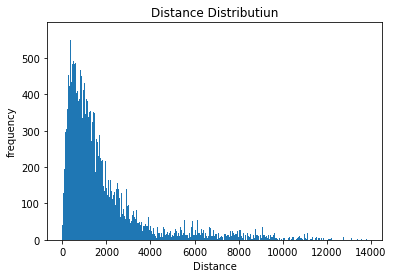

In [7]:

list_distance =[]
for value in add_distance_to_route(file_path_route,file_path):
    try:
        list_distance.append(value['Distance'])
    except KeyError:
        continue
a = np.array(list_distance)
plt.figure()
plt.hist(a,bins=1000)
plt.title('Distance Distributiun')
plt.xlabel("Distance")
plt.ylabel("frequency")
plt.show()

